In [ ]:
# Import necessary libraries
import os

# Define file paths (update if necessary)
buggy_file = "/content/train.buggy-fixed.buggy"  # Path to buggy code file
fixed_file = "/content/train.buggy-fixed.fixed"  # Path to fixed code file

# Read and display a few examples
with open(buggy_file, "r", encoding="utf-8") as f_buggy, open(fixed_file, "r", encoding="utf-8") as f_fixed:
    buggy_lines = f_buggy.readlines()
    fixed_lines = f_fixed.readlines()

print(len(buggy_lines))
print(len(fixed_lines))

52364
52364


In [ ]:
import os

def load_data(buggy_file, fixed_file):
    with open(buggy_file, 'r', encoding='utf-8') as buggy_f, open(fixed_file, 'r', encoding='utf-8') as fixed_f:
        buggy_lines = buggy_f.readlines()  # Corrected variable name
        fixed_lines = fixed_f.readlines()  # Corrected variable name

    print(f"🔹 Buggy Samples: {len(buggy_lines)} | Fixed Samples: {len(fixed_lines)}")  # Debugging Output

    assert len(buggy_lines) == len(fixed_lines), "Mismatch between buggy and fixed samples!"

    return buggy_lines, fixed_lines


def preprocess_code(code):
    """
    Basic preprocessing: Removes extra spaces, converts tabs to spaces, and normalizes Java code.
    """
    code = code.replace("\t", " ")  # Convert tabs to spaces
    code = "\n".join([line.strip() for line in code.split("\n") if line.strip()])  # Trim each line and remove empty lines
    return code

def save_preprocessed_data(buggy_codes, fixed_codes, output_file):
    """
    Saves preprocessed buggy-fixed code pairs to a structured text file.
    """
    with open(output_file, 'w', encoding='utf-8') as f:
        for buggy, fixed in zip(buggy_codes, fixed_codes):
            f.write("BUGGY:\n" + buggy + "\nFIXED:\n" + fixed + "\n=====\n")

# File paths
dataset_path = "/content"
train_buggy = os.path.join(dataset_path, "train.buggy-fixed.buggy")
train_fixed = os.path.join(dataset_path, "train.buggy-fixed.fixed")

# Load and preprocess data
buggy_samples, fixed_samples = load_data(train_buggy, train_fixed)
buggy_samples = [preprocess_code(code) for code in buggy_samples]
fixed_samples = [preprocess_code(code) for code in fixed_samples]

# Save cleaned data
save_preprocessed_data(buggy_samples, fixed_samples, "preprocessed_train.txt")

print(f"✅ Preprocessing complete! Saved {len(buggy_samples)} samples to 'preprocessed_train.txt'.")


🔹 Buggy Samples: 52364 | Fixed Samples: 52364
✅ Preprocessing complete! Saved 52364 samples to 'preprocessed_train.txt'.


In [ ]:
!pip install transformers accelerate bitsandbytes peft torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
import json

# Load preprocessed text file
with open("preprocessed_train.txt", "r", encoding="utf-8") as f:
    raw_data = f.read().split("=====\n")[:-1]  # Split based on your separator

# Extract buggy & fixed code pairs
dataset_dict = []
for sample in raw_data:
    buggy, fixed = sample.split("\nFIXED:\n")
    buggy = buggy.replace("BUGGY:\n", "").strip()
    fixed = fixed.strip()
    dataset_dict.append({"buggy_code": buggy, "fixed_code": fixed})

# Save to JSON
with open("preprocessed_train.json", "w", encoding="utf-8") as f:
    json.dump(dataset_dict, f, indent=4)

print("✅ Dataset converted to JSON!")


✅ Dataset converted to JSON!


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load dataset from JSON file
dataset = load_dataset("json", data_files="preprocessed_train.json")

# Load CodeT5 tokenizer
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-small")

def tokenize_function(examples):
    return tokenizer(
        examples["buggy_code"],
        text_target=examples["fixed_code"],  # For seq2seq models
        padding="max_length",
        truncation=True,
        max_length=512
    )

# Apply tokenization
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["buggy_code", "fixed_code"])


Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Map:   0%|          | 0/52364 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSeq2SeqLM, BitsAndBytesConfig
import torch
from peft import LoraConfig, get_peft_model
import bitsandbytes as bnb

# ✅ Configure 4-bit quantization
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True
)

# ✅ Load CodeT5 with 4-bit quantization
model = AutoModelForSeq2SeqLM.from_pretrained(
    "Salesforce/codet5-small",
    device_map="auto",
    quantization_config=bnb_config
)

# ✅ Apply LoRA to correct target modules
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q", "v", "k", "o", "wi", "wo"],  # ✅ Correct layers
    lora_dropout=0.05,
    bias="none",
    task_type="SEQ_2_SEQ_LM"
)

# ✅ Inject LoRA into CodeT5
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

trainable params: 2,162,688 || all params: 62,654,976 || trainable%: 3.4517


In [ ]:
def load_validation_data(buggy_path, fixed_path):
    with open(buggy_path, "r", encoding="utf-8") as f:
        buggy_code = f.readlines()

    with open(fixed_path, "r", encoding="utf-8") as f:
        fixed_code = f.readlines()

    return [{"input": b.strip(), "output": f.strip()} for b, f in zip(buggy_code, fixed_code)]

# Load validation data
validation_data = load_validation_data("/content/valid.buggy-fixed.buggy", "/content/valid.buggy-fixed.fixed")
from transformers import AutoTokenizer

# Load CodeT5 tokenizer
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-small")

# Tokenization function
def preprocess_function(examples):
    model_inputs = tokenizer(examples["input"], padding="max_length", truncation=True, max_length=512)
    labels = tokenizer(examples["output"], padding="max_length", truncation=True, max_length=512)
    model_inputs["labels"] = labels["input_ids"]  # Assign tokenized outputs as labels
    return model_inputs

# Apply tokenization
tokenized_validation_data = [preprocess_function(example) for example in validation_data]
from datasets import Dataset

valid_dataset = Dataset.from_list(tokenized_validation_data)


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./qlora_codet5",
    evaluation_strategy="steps",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir="./logs",
    report_to="none",
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=valid_dataset
)

trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss
500,0.292900,0.044040
1000,0.050100,0.037028
1500,0.042900,0.034695
2000,0.040900,0.031762
2500,0.037000,0.030819
3000,0.035700,0.030295
3500,0.034600,0.028678
4000,0.033900,0.028724
4500,0.033800,0.028215
5000,0.032300,0.027916


TrainOutput(global_step=19638, training_loss=0.03759058802175672, metrics={'train_runtime': 12736.9399, 'train_samples_per_second': 12.334, 'train_steps_per_second': 1.542, 'total_flos': 2.2304798577524736e+16, 'train_loss': 0.03759058802175672, 'epoch': 3.0})

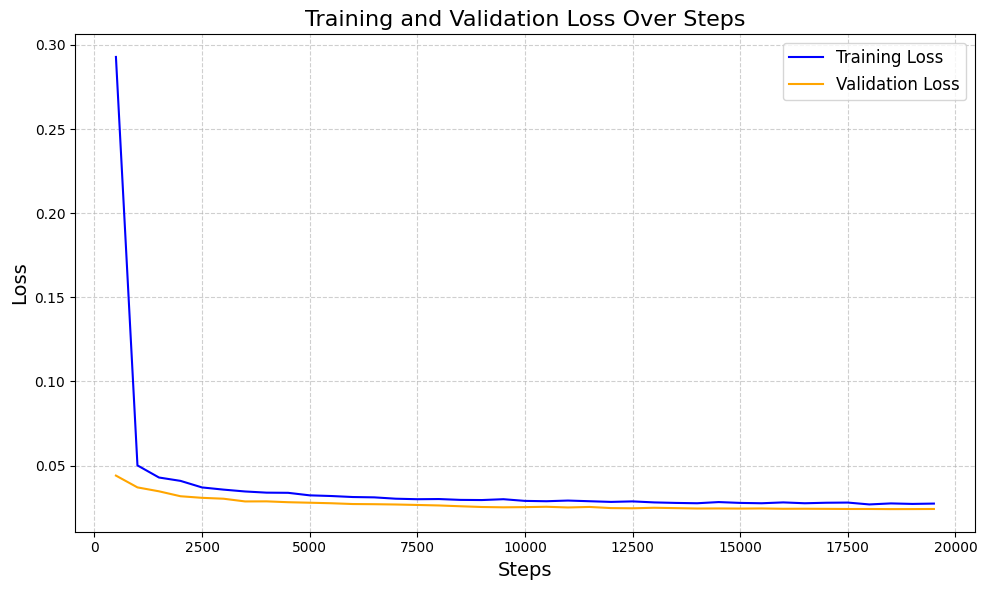

In [ ]:
import matplotlib.pyplot as plt

# Data
steps = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
         5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000,
         10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500,
         15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500]

training_loss = [0.292900, 0.050100, 0.042900, 0.040900, 0.037000, 0.035700,
                 0.034600, 0.033900, 0.033800, 0.032300, 0.031900, 0.031300,
                 0.031100, 0.030300, 0.030000, 0.030100, 0.029600, 0.029500,
                 0.030000, 0.029000, 0.028800, 0.029200, 0.028800, 0.028400,
                 0.028700, 0.028100, 0.027800, 0.027600, 0.028300, 0.027800,
                 0.027600, 0.028100, 0.027600, 0.027900, 0.028000, 0.026900,
                 0.027500, 0.027200, 0.027400]

validation_loss = [0.044040, 0.037028, 0.034695, 0.031762, 0.030819, 0.030295,
                   0.028678, 0.028724, 0.028215, 0.027916, 0.027606, 0.027135,
                   0.027035, 0.026859, 0.026580, 0.026288, 0.025809, 0.025370,
                   0.025184, 0.025295, 0.025502, 0.025095, 0.025403, 0.024727,
                   0.024606, 0.024916, 0.024698, 0.024476, 0.024511, 0.024435,
                   0.024514, 0.024310, 0.024340, 0.024270, 0.024190, 0.024190,
                   0.024114, 0.024135, 0.024191]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, label='Training Loss', color='blue')
plt.plot(steps, validation_loss, label='Validation Loss', color='orange')

# Adding labels and title
plt.title('Training and Validation Loss Over Steps', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
model.save_pretrained("codet5-lora-finetuned")
tokenizer.save_pretrained("codet5-lora-finetuned")


('codet5-lora-finetuned/tokenizer_config.json',
 'codet5-lora-finetuned/special_tokens_map.json',
 'codet5-lora-finetuned/vocab.json',
 'codet5-lora-finetuned/merges.txt',
 'codet5-lora-finetuned/added_tokens.json',
 'codet5-lora-finetuned/tokenizer.json')

In [ ]:
metrics = trainer.evaluate()
print(metrics)


{'eval_loss': 0.02418339252471924, 'eval_runtime': 131.2444, 'eval_samples_per_second': 49.876, 'eval_steps_per_second': 6.24, 'epoch': 3.0}


In [ ]:
from transformers import pipeline

# Load the fine-tuned model
from peft import PeftModel
from transformers import AutoModelForSeq2SeqLM

base_model = AutoModelForSeq2SeqLM.from_pretrained("Salesforce/codet5-small")
model = PeftModel.from_pretrained(base_model, "codet5-lora-finetuned")
tokenizer = AutoTokenizer.from_pretrained("codet5-lora-finetuned")

# Define a pipeline for inference
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

# Example input (as per your dataset)
input_text = "public int add(int a, int b) { return a + ; }"
output = pipe(input_text, max_length=64, do_sample=False)

print("Fixed Code:\n", output[0]['generated_text'])


Device set to use cuda:0
The model 'PeftModelForSeq2SeqLM' is not supported for text2text-generation. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'Qwen2AudioForConditionalGeneration', 'SeamlessM4TForTextToText', 'SeamlessM4Tv2ForTextToText', 'SwitchTransformersForConditionalGeneration', 'T5ForConditionalGeneration', 'UMT5ForConditionalGeneration', 'XLMProphetNetForConditionalGen

Fixed Code:
 public int add ( int a , int b ) { return a + b ; }


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("Salesforce/codet5-small")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [ ]:
from peft import PeftModel

# Assuming your LoRA adapter is in a folder called "your_adapter_folder"
model = PeftModel.from_pretrained(model, "/content/codet5-lora-finetuned")

/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:599: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_A.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_B.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.k.lora_A.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.k.lora_B.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_A.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_B.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.o.lora_A.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.0.SelfAttention.o.lora_B.default.weight', 'base_model.model.base_model.model.encoder.block.0.layer.1.DenseReluDense

In [ ]:
def generate_fix(buggy_code):
    inputs = tokenizer(buggy_code, return_tensors="pt", padding=True)
    output = model.generate(**inputs, max_length=512)
    fixed_code = tokenizer.decode(output[0], skip_special_tokens=True)
    return fixed_code

buggy_code = """public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }"""
fixed_code = generate_fix(buggy_code)
print(fixed_code)

public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }


In [ ]:
import torch

# Load tokenizer and model from your saved directory
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from peft import PeftModel

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Path where you saved your model and tokenizer
model_path = "/content/codet5-lora-finetuned"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load base model
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
model = PeftModel.from_pretrained(model, model_path)

# Send model to device
model = model.to(device)
model.eval()

# Generation function
def generate_fix(buggy_code):
    inputs = tokenizer(buggy_code, return_tensors="pt", padding=True, truncation=True).to(device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=128,
            num_beams=5,
            early_stopping=True
        )

    # Decode the output
    fixed_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return fixed_code

# Example usage:
buggy = """public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }"""

fixed = generate_fix(buggy)
print(f"Fixed Code:\n{fixed}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fixed Code:
public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }


In [ ]:
buggy_samples = [
    "public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }",
    "public static int add(int a, int b) { return a - b; }",
    # Add more buggy code samples here
]

for buggy_code in buggy_samples:
    fixed_code = generate_fix(buggy_code)
    print(f"Buggy Code:\n{buggy_code}\n")
    print(f"Fixed Code:\n{fixed_code}\n")
    print("="*50)


Buggy Code:
public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }

Fixed Code:
public static TYPE_1 init ( java.lang.String name , java.util.Date date ) { TYPE_1 VAR_1 = new TYPE_1 ( name , date ) ; return VAR_1 ; }

Buggy Code:
public static int add(int a, int b) { return a - b; }

Fixed Code:
public static int add ( int a , int b ) { return a + b ; }



In [ ]:
pip install nltk


In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def compute_bleu(reference, prediction):
    """
    Compute BLEU score between a reference and a prediction.
    """
    reference_tokens = nltk.word_tokenize(reference)
    prediction_tokens = nltk.word_tokenize(prediction)
    score = sentence_bleu([reference_tokens], prediction_tokens)
    return score


In [ ]:
# Read buggy inputs
with open("/content/test.buggy-fixed.buggy", "r", encoding="utf-8") as f:
    buggy_codes = [line.strip() for line in f if line.strip()]

# Read ground truth fixed codes
with open("/content/test.buggy-fixed.fixed", "r", encoding="utf-8") as f:
    ground_truth_fixed_codes = [line.strip() for line in f if line.strip()]


predictions = []

for buggy_code in buggy_codes:
    inputs = tokenizer(buggy_code, return_tensors="pt", padding=True, truncation=True).to(model.device)
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=256)
    pred_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predictions.append(pred_code)




KeyboardInterrupt: 

In [ ]:
len(predictions)


328

In [ ]:
ground_truth_fixed_codes = ground_truth_fixed_codes[:328]

len(ground_truth_fixed_codes)


328

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Tokenize the references and hypotheses
references = [[ref.split()] for ref in ground_truth_fixed_codes]  # List of list of references
hypotheses = [pred.split() for pred in predictions]

# Calculate BLEU
bleu_score = corpus_bleu(references, hypotheses)

print(f"BLEU Score: {bleu_score * 100:.2f}")

BLEU Score: 91.03


In [ ]:
import seaborn as sns

sns.violinplot(bleu_score)
plt.title('Distribution of BLEU Scores')
plt.show()


TypeError: object of type 'float' has no len()

In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
from peft import PeftModel

In [ ]:
repo_name = "qlora-codet5-java-bugfix"  # 🔥 you can change this name as you want


In [ ]:
model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)


adapter_model.safetensors:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/nairabhiram907/qlora-codet5-java-bugfix/commit/6bd83a5055bb5083bbcb4e3994bafdea608c95cd', commit_message='Upload tokenizer', commit_description='', oid='6bd83a5055bb5083bbcb4e3994bafdea608c95cd', pr_url=None, repo_url=RepoUrl('https://huggingface.co/nairabhiram907/qlora-codet5-java-bugfix', endpoint='https://huggingface.co', repo_type='model', repo_id='nairabhiram907/qlora-codet5-java-bugfix'), pr_revision=None, pr_num=None)